Now that we have reddit posts labeled with which stocks, it is about, lets gather some stats about the distribution of stock related posts in different subreddits.

In [1]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'full_combined.csv'), index_col=0)
df.tail()

,created,title,selftext,upvote_ratio,score,gilded,total_awards_received,num_comments,stock,subreddit
771454,2021-12-24 15:18:30,NVAX - Lambo or Ramen (Part II),Here's a link to my part I - [LINK](https://ww...,0.92,69,1,3,53,"SII,NVAX",wallstreetbets
771559,2021-12-24 20:01:26,Suspicions about TSLA,Why are people so keen on buying stocks and op...,0.56,19,0,0,214,GM,wallstreetbets
771567,2021-12-24 20:18:09,I’ve Had an Epiphany (Or am I retarted? You te...,I came up with a strategy that seems like a no...,0.80,59,0,0,148,ABCL,wallstreetbets
771580,2021-12-24 21:12:42,Best EV play - Bullish as F ….. MB-private ana...,If I were a TESLA investor... though I'm not.....,0.48,0,0,0,47,"TSLA,FORD",wallstreetbets
771602,2021-12-24 22:22:52,China's Currency Trouble.,The Chinese Yuan is a volatile currency and th...,0.79,68,0,0,68,PBC,wallstreetbets


In [2]:
df.groupby('subreddit').size().sort_values()

subreddit
securityanalysis             3
robinhood                    7
financialindependence       11
forex                       36
robinhoodpennystocks       138
investing                  218
stockmarket                411
options                    633
pennystocks                807
stocks                    2008
personalfinance           6966
wallstreetbets           16809
gme                      20702
dtype: int64

In [3]:
stocks = df['stock']
stock_set = set()
for x in stocks:

    stock_set = stock_set | set(x.split(','))

len(stock_set)

2898

In [4]:
import pprint

n_occurrences = {}
for x in stocks:
    for symb in x.split(','):
        n_occurrences.setdefault(symb, 0)
        n_occurrences[symb] += 1

n_occurrences = [(val, key) for key, val in n_occurrences.items()]
n_occurrences.sort(reverse=True)

pprint.pprint(n_occurrences)


[(25874, 'GME'),
 (3834, 'AMC'),
 (1671, 'AMZN'),
 (1559, 'IRS'),
 (1444, 'TSLA'),
 (1266, 'AAPL'),
 (1184, 'TWTR'),
 (1019, 'BB'),
 (869, 'RC'),
 (849, 'NOK'),
 (779, 'NDAQ'),
 (728, 'MSFT'),
 (709, 'TD'),
 (708, 'CC'),
 (664, 'CS'),
 (636, 'CCF'),
 (540, 'PLTR'),
 (521, 'AMD'),
 (506, 'BC'),
 (472, 'MSM'),
 (466, 'HYT'),
 (455, 'NFLX'),
 (403, 'FORD'),
 (393, 'RSI'),
 (393, 'ATH'),
 (375, 'IBKR'),
 (374, 'GSBD'),
 (374, 'BAC'),
 (366, 'FICO'),
 (341, 'MS'),
 (341, 'DTC'),
 (333, 'APR'),
 (325, 'NVDA'),
 (275, 'GM'),
 (262, 'PFE'),
 (262, 'EFX'),
 (261, 'SI'),
 (235, 'INTC'),
 (233, 'MA'),
 (218, 'SPCE'),
 (213, 'SOFI'),
 (212, 'TRU'),
 (202, 'NIO'),
 (196, 'CLOV'),
 (193, 'ALLY'),
 (190, 'TLRY'),
 (180, 'SNDL'),
 (174, 'EBAY'),
 (172, 'UI'),
 (168, 'DOW'),
 (164, 'CRSR'),
 (157, 'V'),
 (154, 'IEX'),
 (153, 'TGT'),
 (153, 'FB'),
 (140, 'TBC'),
 (139, 'DKNG'),
 (136, 'ABNB'),
 (132, 'WKHS'),
 (132, 'GS'),
 (127, 'GE'),
 (125, 'TECH'),
 (120, 'ROKU'),
 (116, 'VIAC'),
 (116, 'LFG'),
 (11

Lets limit the study to the 100 most commonly discussed stocks

In [5]:
stock_subset = [x[1] for x in n_occurrences[0:100]]
print(len(df))
def drop_stocks_from_df(x, subset):
    s = x.split(',')
    new_s = []
    for symb in s:
        if symb in subset:
            new_s.append(symb)
    return ','.join(new_s)

df['stock'] = df['stock'].apply(lambda x : drop_stocks_from_df(x, stock_subset))

df = df.drop(df[df['stock'] == ''].index)
print(len(df))

48749
41332


In [6]:
# verify that we now have 100 stocks in the df
stocks = df['stock']
stock_set = set()
for x in stocks:

    stock_set = stock_set | set(x.split(','))

len(stock_set)

100

In [7]:
df.groupby('subreddit').size().sort_values()

subreddit
robinhood                    2
securityanalysis             3
financialindependence        4
forex                       19
robinhoodpennystocks        32
investing                  103
stockmarket                231
pennystocks                292
options                    315
stocks                    1224
personalfinance           5033
wallstreetbets           14485
gme                      19589
dtype: int64

r/financialindependence, r/forex, r/robinhood, r/robinhoodpennystocks and r/securityanalysis contain less than 50 posts each, and due to the sparseness of data for these subreddits, they are removed

In [8]:
df = df[~(df['subreddit'].str.contains('financialindependence|forex|robinhood|robinhoodpennystocks|securityanalysis'))]
df.groupby('subreddit').size().sort_values()

subreddit
investing            103
stockmarket          231
pennystocks          292
options              315
stocks              1224
personalfinance     5033
wallstreetbets     14485
gme                19589
dtype: int64

In [9]:
from datetime import datetime
df['created'] = pd.to_datetime(df['created'])
start_date = df['created'].dt.date.min()
end_date = df['created'].dt.date.max()
print('first date:', start_date, ', end date:', end_date)
df['created'] = df['created'].dt.date
df.to_csv(os.path.join(os.getcwd(), 'data', 'filtered_posts.csv'))

first date: 2021-01-02 , end date: 2021-12-25


Now that we have limited ourselves to 100 stocks, lets fetch the stock market data in form of daily close prices

In [10]:
import yfinance as yf

data = yf.download(stock_subset, start=start_date, end='2021-12-28')

[*********************100%***********************]  100 of 100 completed


In [12]:
prices = data['Adj Close']
prices.head()

,AAPL,ABNB,AC,ALLY,AMC,AMD,AMZN,APR,ATH,BABA,...,TWTR,UBER,UBS,UI,UWMC,V,VIAC,WKHS,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,128.617096,139.149994,34.782532,34.772442,2.01,92.300003,3186.629883,NaN,41.990002,227.850006,...,54.529999,51.139999,13.963018,269.026337,12.299272,216.430527,35.790138,21.420000,144.236282,39.095951
2021-01-05,130.207291,148.300003,34.275124,35.145393,1.98,92.769997,3218.510010,NaN,42.869999,240.399994,...,53.880001,54.009998,14.275696,276.219940,11.995352,213.200363,36.171509,22.430000,143.468491,40.980091
2021-01-06,125.824326,142.770004,33.608524,36.283867,2.01,90.330002,3138.379883,NaN,46.009998,227.610001,...,53.259998,52.480000,14.754484,266.035614,11.397008,211.321884,39.310482,23.650000,144.364258,42.025787
2021-01-07,130.117844,151.270004,35.658070,36.519413,2.05,95.160004,3162.159912,NaN,46.209999,226.899994,...,52.330002,56.130001,15.184416,255.960526,11.805402,212.504639,39.232254,27.600000,144.354385,42.355515
2021-01-08,131.240921,149.770004,36.304768,36.676441,2.14,94.580002,3182.699951,NaN,45.160000,236.190002,...,51.480000,53.279999,14.940136,255.354431,12.061833,214.134613,39.173580,25.565001,144.334717,42.826550


We want to have labels in our data that indicate if the stock has gone up or down. 

In [13]:
# first, we need to "fill in the blanks", i.e. dates that are not in the df(weekends, holidays etc), the common thing is to fill in the previous value
prices.index = pd.to_datetime(prices.index)
prices.tail(10)

,AAPL,ABNB,AC,ALLY,AMC,AMD,AMZN,APR,ATH,BABA,...,TWTR,UBER,UBS,UI,UWMC,V,VIAC,WKHS,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-13,175.740005,171.039993,39.459999,47.180000,23.240000,133.800003,3391.350098,31.170000,79.720001,122.239998,...,44.599998,35.730000,17.770000,293.829987,6.68,211.020004,30.090000,5.05,143.570007,61.630001
2021-12-14,174.330002,167.960007,41.119999,48.080002,24.500000,135.600006,3381.830078,30.320000,78.559998,126.580002,...,44.349998,37.259998,17.760000,284.459991,6.75,209.979996,29.600000,4.98,144.940002,61.540001
2021-12-15,179.300003,168.139999,42.500000,47.840000,24.660000,146.500000,3466.300049,30.400000,80.540001,122.470001,...,44.070000,37.830002,17.590000,296.380005,6.22,212.309998,29.559999,5.05,145.770004,61.270000
2021-12-16,172.259995,156.380005,42.570000,47.360001,24.450001,138.639999,3377.419922,29.299999,79.919998,120.250000,...,43.130001,37.700001,17.860001,292.440002,6.68,214.369995,29.740000,4.97,143.339996,61.369999
2021-12-17,171.139999,157.910004,44.139999,46.240002,29.120001,137.750000,3400.350098,29.400000,80.599998,122.099998,...,43.070000,39.680000,17.410000,308.809998,6.51,211.880005,29.520000,5.30,138.750000,60.029999
2021-12-20,169.750000,157.229996,43.000000,45.029999,29.700001,135.800003,3341.580078,29.680000,78.709999,115.000000,...,42.980000,39.700001,17.250000,302.029999,6.26,208.740005,28.680000,4.83,139.199997,59.160000
2021-12-21,172.990005,165.660004,43.900002,46.459999,30.299999,144.250000,3408.340088,30.670000,82.519997,122.980003,...,44.360001,41.970001,17.459999,306.950012,6.30,215.380005,29.350000,5.05,139.619995,60.500000
2021-12-22,175.639999,169.289993,44.500000,47.240002,28.680000,143.880005,3420.739990,31.520000,82.790001,117.809998,...,43.900002,43.020000,17.590000,309.989990,6.26,217.960007,29.180000,5.08,139.800003,60.990002
2021-12-23,176.279999,171.309998,44.950001,47.580002,28.520000,146.139999,3421.370117,32.650002,85.209999,118.660004,...,44.160000,43.910000,17.820000,311.750000,6.38,216.619995,30.580000,5.18,139.490005,61.020000


In [14]:
prices.to_csv(os.path.join(os.getcwd(), 'data', 'filtered_prices.csv'))

In [15]:
prices.head()

,AAPL,ABNB,AC,ALLY,AMC,AMD,AMZN,APR,ATH,BABA,...,TWTR,UBER,UBS,UI,UWMC,V,VIAC,WKHS,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,128.617096,139.149994,34.782532,34.772442,2.01,92.300003,3186.629883,NaN,41.990002,227.850006,...,54.529999,51.139999,13.963018,269.026337,12.299272,216.430527,35.790138,21.420000,144.236282,39.095951
2021-01-05,130.207291,148.300003,34.275124,35.145393,1.98,92.769997,3218.510010,NaN,42.869999,240.399994,...,53.880001,54.009998,14.275696,276.219940,11.995352,213.200363,36.171509,22.430000,143.468491,40.980091
2021-01-06,125.824326,142.770004,33.608524,36.283867,2.01,90.330002,3138.379883,NaN,46.009998,227.610001,...,53.259998,52.480000,14.754484,266.035614,11.397008,211.321884,39.310482,23.650000,144.364258,42.025787
2021-01-07,130.117844,151.270004,35.658070,36.519413,2.05,95.160004,3162.159912,NaN,46.209999,226.899994,...,52.330002,56.130001,15.184416,255.960526,11.805402,212.504639,39.232254,27.600000,144.354385,42.355515
2021-01-08,131.240921,149.770004,36.304768,36.676441,2.14,94.580002,3182.699951,NaN,45.160000,236.190002,...,51.480000,53.279999,14.940136,255.354431,12.061833,214.134613,39.173580,25.565001,144.334717,42.826550


In [16]:
# now, we can create "labels" for some different time horizons
from numpy import sign, nan
t_horizons = [1, 3, 7, 14]
def create_growth_df(price_df, horizon):
    growth = price_df.copy()
    for i in range(len(price_df)-horizon):
        current = price_df.iloc[i]
        future = price_df.iloc[i+horizon]
        growth.iloc[i] = sign(future-current)
    growth.iloc[-horizon:] = nan
    return growth

labeled_data_dir = os.path.join(os.getcwd(), 'data', 'labeled')
if not os.path.exists(labeled_data_dir):
    os.mkdir(labeled_data_dir)
for h in t_horizons:
    labels_df = create_growth_df(prices, h)
    labels_df.to_csv(os.path.join(labeled_data_dir, 'price_labels_'+str(h)+'d.csv'))


In [17]:
prices.head()

,AAPL,ABNB,AC,ALLY,AMC,AMD,AMZN,APR,ATH,BABA,...,TWTR,UBER,UBS,UI,UWMC,V,VIAC,WKHS,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,128.617096,139.149994,34.782532,34.772442,2.01,92.300003,3186.629883,NaN,41.990002,227.850006,...,54.529999,51.139999,13.963018,269.026337,12.299272,216.430527,35.790138,21.420000,144.236282,39.095951
2021-01-05,130.207291,148.300003,34.275124,35.145393,1.98,92.769997,3218.510010,NaN,42.869999,240.399994,...,53.880001,54.009998,14.275696,276.219940,11.995352,213.200363,36.171509,22.430000,143.468491,40.980091
2021-01-06,125.824326,142.770004,33.608524,36.283867,2.01,90.330002,3138.379883,NaN,46.009998,227.610001,...,53.259998,52.480000,14.754484,266.035614,11.397008,211.321884,39.310482,23.650000,144.364258,42.025787
2021-01-07,130.117844,151.270004,35.658070,36.519413,2.05,95.160004,3162.159912,NaN,46.209999,226.899994,...,52.330002,56.130001,15.184416,255.960526,11.805402,212.504639,39.232254,27.600000,144.354385,42.355515
2021-01-08,131.240921,149.770004,36.304768,36.676441,2.14,94.580002,3182.699951,NaN,45.160000,236.190002,...,51.480000,53.279999,14.940136,255.354431,12.061833,214.134613,39.173580,25.565001,144.334717,42.826550


One delimitation that I will make is that the same sentiment score will be assigned to multiple stocks if they occur in the same post

In [50]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'filtered_posts.csv'), index_col=0)
df.head()

,created,title,selftext,upvote_ratio,score,gilded,total_awards_received,num_comments,stock,subreddit
145,2021-01-22,Hold the line. Stocks have no time limit. Shor...,We have plenty of solid DD that has a fair val...,0.92,9,0,0,0,TWTR,gme
239,2021-01-23,Is it too late to buy GME??,I’m a 19yr student with around 500 dollars spa...,0.96,35,0,0,22,GME,gme
437,2021-01-25,BB,"Need some reinforcements at BB stock, trying t...",0.43,0,0,0,1,BB,gme
753,2021-01-26,gme,im nervous,1.00,4,0,0,6,GME,gme
1060,2021-01-27,10k members of the r/GME community,I know I may have joined late but fuck it I’m ...,1.00,4,0,0,1,GME,gme


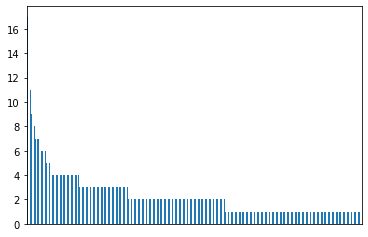

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def contains_stock(x, symbol):
   return any([symbol == s for s in x.split(',')])

def idx_contains_stock(series, symbol):
    return series.apply(lambda x : contains_stock(x, symbol))

def visualize_subreddit_posts_about_one_stock(symbol, subreddit, df):
    subreddit_posts = df[df['subreddit']==subreddit]
    stock_posts = subreddit_posts[idx_contains_stock(subreddit_posts['stock'], symbol)]
    fig, ax = plt.subplots()
    ax.xaxis.set_ticks([])
    ax.axes.xaxis.set_visible(False)
    stock_posts['created'].value_counts().plot(ax=ax, kind='bar')
 

visualize_subreddit_posts_about_one_stock('AAPL', 'wallstreetbets', df)

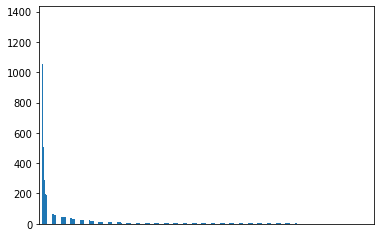

In [52]:
visualize_subreddit_posts_about_one_stock('GME', 'wallstreetbets', df)